In [ ]:
import tensorflow as tf
import pickle
from pathlib import Path
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.layers import Dropout
from sklearn.model_selection import KFold
from tensorflow.keras.initializers import RandomNormal

In [ ]:
# processing dataset
train_images = pickle.load(open('/content/drive/MyDrive/636_project1_train_images', 'rb'))
train_labels = pickle.load(open('/content/drive/MyDrive/636_project1_train_labels', 'rb'))

train_images_new = train_images[0:55000]
train_labels_new = train_labels[0:55000]

val_images = train_images[55000:59000]
val_labels = train_labels[55000:59000]

test_images = train_images[59000:60000]
test_labels = train_labels[59000:60000]

# My model is called model_1, so you can use "test_loss, test_acc = model_1.evaluate(test_images, test_labels)" to run my model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


train_images_new = np.reshape(train_images_new, (len(train_images_new), 28, 28))
train_images_new = tf.cast(train_images_new, tf.float32) / 255.
train_labels_new = to_categorical(train_labels_new)

val_images = np.reshape(val_images, (len(val_images), 28, 28))
val_images = tf.cast(val_images, tf.float32) / 255.
val_labels = to_categorical(val_labels)

def define_model(): #conv the images to 2d
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2))) #MaxPooling to prevent overfitting
 model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.002), activation='relu', kernel_initializer='he_uniform'))
 model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.002), activation='relu', kernel_initializer='he_uniform'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dropout(0.4))#dropout for fix overfitting
 model.add(Dense(200, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)#differnt learning rate will help the model to learn the dataset
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model


model_1 = define_model()
history_f = model_1.fit(train_images_new, train_labels_new, 
           epochs=100, batch_size=128, validation_data=(val_images, val_labels), verbose=1)


Epoch 1/100
430/430 [==============================] - 5s 8ms/step - loss: 3.1321 - accuracy: 0.1583 - val_loss: 2.8343 - val_accuracy: 0.2465
Epoch 2/100
430/430 [==============================] - 3s 8ms/step - loss: 2.6678 - accuracy: 0.2720 - val_loss: 2.4688 - val_accuracy: 0.3160
Epoch 3/100
430/430 [==============================] - 4s 9ms/step - loss: 2.3854 - accuracy: 0.3184 - val_loss: 2.2684 - val_accuracy: 0.3307
Epoch 4/100
430/430 [==============================] - 4s 8ms/step - loss: 2.1962 - accuracy: 0.3436 - val_loss: 2.0676 - val_accuracy: 0.3715
Epoch 5/100
430/430 [==============================] - 3s 8ms/step - loss: 1.9510 - accuracy: 0.4065 - val_loss: 1.7696 - val_accuracy: 0.4773
Epoch 6/100
430/430 [==============================] - 3s 8ms/step - loss: 1.7131 - accuracy: 0.4764 - val_loss: 1.5692 - val_accuracy: 0.5200
Epoch 7/100
430/430 [==============================] - 4s 9ms/step - loss: 1.5711 - accuracy: 0.5152 - val_loss: 1.4830 - val_accuracy: 0.5405

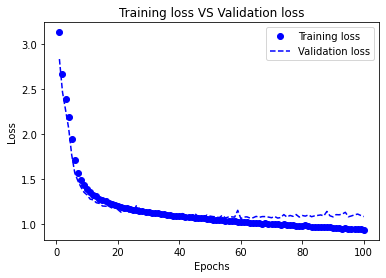

In [ ]:
import matplotlib.pyplot as plt
loss_value = history_f.history["loss"]
acc = history_f.history["accuracy"]
val_loss = history_f.history["val_loss"]
val_acc = history_f.history["val_accuracy"]
epochs = range(1, 101)
plt.plot(epochs, loss_value, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Training loss VS Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

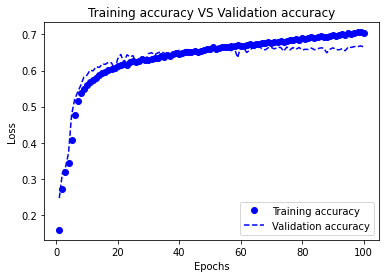

In [ ]:
epochs = range(1, 101)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b--",
         label="Validation accuracy")
plt.title("Training accuracy VS Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
test_images = np.reshape(test_images, (len(test_images), 28, 28))
test_images = tf.cast(test_images, tf.float32) / 255.
test_labels = to_categorical(test_labels)
_, acc = model_1.evaluate(test_images, test_labels, verbose=1)
print('> %.3f' % (acc * 100.0))

32/32 [==============================] - 0s 4ms/step - loss: 1.0721 - accuracy: 0.6640
> 66.400
